# Universal Healthcare NLP Project

###### This project will explore twitter discussions surrounding the implementation of universal healthcare. The aim will be to create a topic model to display the most common fields of concern for those discussing universal healthcare to better create campaigns and solutions to address any hesitations against it.  

This notebook follows individual sentiment analysis on each of the topics from the prior topic modeling in modeling notebook (1).

In [1]:
#some libraries
import pandas as pd
import numpy as np
# Import Libraries
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [3]:
##import all dataframes for each topic
df1 = pd.read_csv('/Users/mehikapatel/Universal_HC_NLP/Data/Topic1DF') 
df2 = pd.read_csv('/Users/mehikapatel/Universal_HC_NLP/Data/Topic2DF') 
df3 = pd.read_csv('/Users/mehikapatel/Universal_HC_NLP/Data/Topic3DF') 
df4 = pd.read_csv('/Users/mehikapatel/Universal_HC_NLP/Data/Topic4DF') 
df5 = pd.read_csv('/Users/mehikapatel/Universal_HC_NLP/Data/Topic5DF') 

In [160]:
df5.tweet[3]

'I’m moving to Canada and using up all the universal healthcare and schooling'

## Topic 1 (Political/Rights) Sentiment Analysis

In [31]:
#Calculating Negative, Positive, Neutral and Compound values
df1[["pol","subj"]] = df1["tokens_back_to_text"].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))


for index, row in df1["tokens_back_to_text"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(str(row))
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    
    if neg > pos:
        df1.loc[index, "sentiment"] = "negative"
    elif pos > neg:
        df1.loc[index, "sentiment"] = "positive"
    else:
        df1.loc[index, "sentiment"] = "neutral"
        df1.loc[index, "neg"] = neg
        df1.loc[index, "neu"] = neu
        df1.loc[index, "pos"] = pos
        df1.loc[index, "compound"] = comp


In [32]:
#Creating new data frames for all sentiments (positive, negative and neutral)

negative_twts = df1[df1["sentiment"]=="negative"]
positive_twts = df1[df1["sentiment"]=="positive"]
neutral_twts = df1[df1["sentiment"]=="neutral"]

In [33]:
#Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
pc = count_values_in_column(df1,"sentiment")

pc

,Total,Percentage
positive,5483,47.47
negative,4220,36.54
neutral,1847,15.99


Topic 1 Breakdown:
-------------

* Positive:  47% 
* Negative:  36%
* Neutral:   16% 

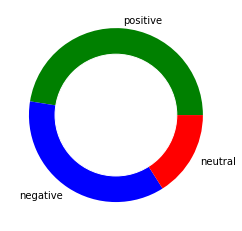

In [34]:
# create data for Pie Chart
pichart = count_values_in_column(df1,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Topic 2(Public Services & Accessibility) Sentiment Analysis

In [35]:
#Calculating Negative, Positive, Neutral and Compound values
df2[["pol","subj"]] = df2["tokens_back_to_text"].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))


for index, row in df2["tokens_back_to_text"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(str(row))
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    
    if neg > pos:
        df2.loc[index, "sentiment"] = "negative"
    elif pos > neg:
        df2.loc[index, "sentiment"] = "positive"
    else:
        df2.loc[index, "sentiment"] = "neutral"
        df2.loc[index, "neg"] = neg
        df2.loc[index, "neu"] = neu
        df2.loc[index, "pos"] = pos
        df2.loc[index, "compound"] = comp


In [36]:
#Creating new data frames for all sentiments (positive, negative and neutral)

negative_twts = df2[df2["sentiment"]=="negative"]
positive_twts = df2[df2["sentiment"]=="positive"]
neutral_twts = df2[df2["sentiment"]=="neutral"]

In [37]:
#Count_values for sentiment
pc = count_values_in_column(df2,"sentiment")

pc

,Total,Percentage
positive,5108,55.54
negative,2289,24.89
neutral,1800,19.57


Topic 2 Breakdown:
-------------

* Positive:  55% 
* Negative:  25%
* Neutral:   20% 

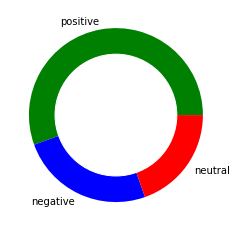

In [38]:
# create data for Pie Chart
pichart = count_values_in_column(df2,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Topic 3(Infrastructure) Sentiment Analysis

In [39]:
#Calculating Negative, Positive, Neutral and Compound values
df3[["pol","subj"]] = df3["tokens_back_to_text"].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))


for index, row in df3["tokens_back_to_text"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(str(row))
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    
    if neg > pos:
        df3.loc[index, "sentiment"] = "negative"
    elif pos > neg:
        df3.loc[index, "sentiment"] = "positive"
    else:
        df3.loc[index, "sentiment"] = "neutral"
        df3.loc[index, "neg"] = neg
        df3.loc[index, "neu"] = neu
        df3.loc[index, "pos"] = pos
        df3.loc[index, "compound"] = comp


In [40]:
#Creating new data frames for all sentiments (positive, negative and neutral)

negative_twts = df3[df3["sentiment"]=="negative"]
positive_twts = df3[df3["sentiment"]=="positive"]
neutral_twts = df3[df3["sentiment"]=="neutral"]

In [41]:
#Count_values for sentiment
pc = count_values_in_column(df3,"sentiment")

pc

,Total,Percentage
positive,1300,52.48
negative,674,27.21
neutral,503,20.31


Topic 3 Breakdown:
-------------

* Positive:  52% 
* Negative:  27%
* Neutral:   20% 

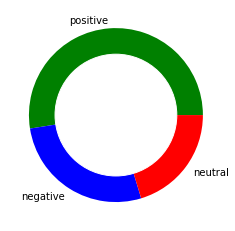

In [42]:
# create data for Pie Chart
pichart = count_values_in_column(df3,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Topic 4 (Quality of Life) Sentiment Analysis

In [43]:
#Calculating Negative, Positive, Neutral and Compound values
df4[["pol","subj"]] = df4["tokens_back_to_text"].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))


for index, row in df4["tokens_back_to_text"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(str(row))
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    
    if neg > pos:
        df4.loc[index, "sentiment"] = "negative"
    elif pos > neg:
        df4.loc[index, "sentiment"] = "positive"
    else:
        df4.loc[index, "sentiment"] = "neutral"
        df4.loc[index, "neg"] = neg
        df4.loc[index, "neu"] = neu
        df4.loc[index, "pos"] = pos
        df4.loc[index, "compound"] = comp


In [44]:
#Creating new data frames for all sentiments (positive, negative and neutral)

negative_twts = df4[df4["sentiment"]=="negative"]
positive_twts = df4[df4["sentiment"]=="positive"]
neutral_twts = df4[df4["sentiment"]=="neutral"]

In [45]:
#Count_values for sentiment
pc = count_values_in_column(df4,"sentiment")

pc

,Total,Percentage
positive,1356,78.88
negative,262,15.24
neutral,101,5.88


Topic 4 Breakdown:
-------------

* Positive:  78% 
* Negative:  15%
* Neutral:   6% 

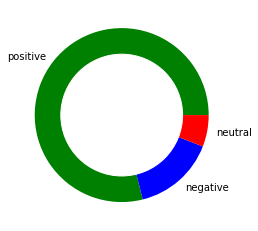

In [46]:
# create data for Pie Chart
pichart = count_values_in_column(df4,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Topic 5 (Comparisons) Sentiment Analysis

In [47]:
#Calculating Negative, Positive, Neutral and Compound values
df5[["pol","subj"]] = df5["tokens_back_to_text"].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))


for index, row in df5["tokens_back_to_text"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(str(row))
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    
    if neg > pos:
        df5.loc[index, "sentiment"] = "negative"
    elif pos > neg:
        df5.loc[index, "sentiment"] = "positive"
    else:
        df5.loc[index, "sentiment"] = "neutral"
        df5.loc[index, "neg"] = neg
        df5.loc[index, "neu"] = neu
        df5.loc[index, "pos"] = pos
        df5.loc[index, "compound"] = comp


In [48]:
#Creating new data frames for all sentiments (positive, negative and neutral)

negative_twts = df5[df5["sentiment"]=="negative"]
positive_twts = df5[df5["sentiment"]=="positive"]
neutral_twts = df5[df5["sentiment"]=="neutral"]

In [49]:
#Count_values for sentiment
pc = count_values_in_column(df5,"sentiment")

pc

,Total,Percentage
positive,666,43.99
negative,549,36.26
neutral,299,19.75


Topic 5 Breakdown:
-------------

* Positive:  43% 
* Negative:  32%
* Neutral:   20% 

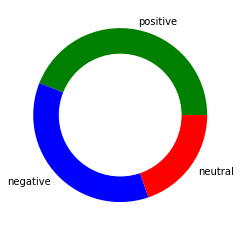

In [50]:
# create data for Pie Chart
pichart = count_values_in_column(df5,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Breakdowns summaries:

Political/Rights Breakdown:
-------------

* Positive:  47% 
* Negative:  36%
* Neutral:   16% 

Most: **Positive**

Public Services & Accessibility Breakdown:
-------------

* Positive:  55% 
* Negative:  25%
* Neutral:   20% 

Most: **Positive**

Infrastructure Breakdown:
-------------

* Positive:  52% 
* Negative:  27%
* Neutral:   20% 

Most: **Positive**

Quality of Life Breakdown:
-------------

* Positive:  78% 
* Negative:  15%
* Neutral:   6% 

Most: **Positive**

Comparisons Breakdown:
-------------

* Positive:  43% 
* Negative:  32%
* Neutral:   20% 

Most: **Positive**

Since all of our topics seem to be mostly positive, we can rank them by sentiment for some nuanced understanding:

**Most positive (most to least):**
1. Quality of Life
2. Public Services & Accessibility
3. Infrastructure
4. Political/Rights
5. Comparisons

**Most negative (most to least):**
1. Political/Rights
2. Comparisons
3. Infrastructure
4. Public Services & Accessibility
5. Quality of Life

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import string 

df1['lemma_tokens'] = df1['lemma_tokens'].str.replace('[^\w\s]','')
df2['lemma_tokens'] = df2['lemma_tokens'].str.replace('[^\w\s]','')
df3['lemma_tokens'] = df3['lemma_tokens'].str.replace('[^\w\s]','')
df4['lemma_tokens'] = df4['lemma_tokens'].str.replace('[^\w\s]','')
df5['lemma_tokens'] = df5['lemma_tokens'].str.replace('[^\w\s]','')

## Visualizations by Topic

### Political/Rights

In [93]:
all_words = [word for tokens in df1['tweet'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df1['tweet']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))
print('Min tweet length is {}'.format(min(tweet_lengths)))

2377230 words total, with a vocabulary size of 535
Max tweet length is 964
Min tweet length is 4


/Users/mehikapatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


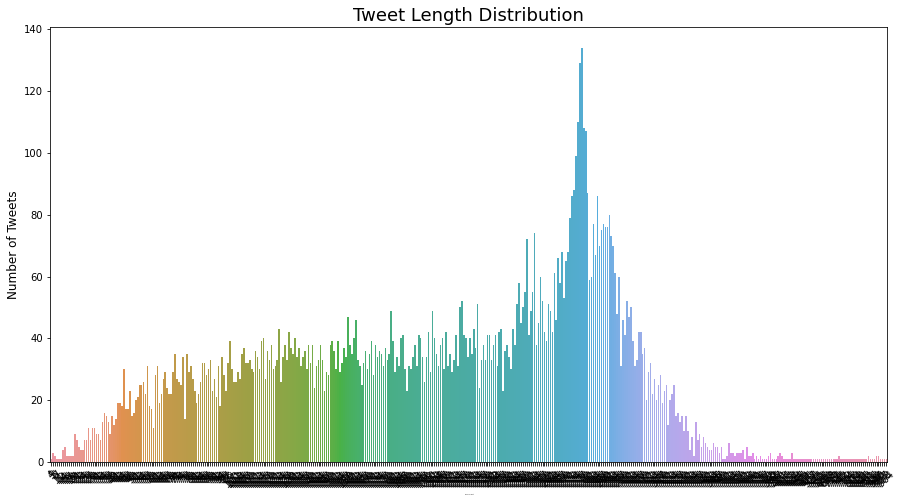

In [94]:
plt.figure(figsize = (15,8))
ax = sns.countplot(tweet_lengths)

plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = .2)
plt.xticks(rotation=45)
# ax.set_xlim(5, 900)
# ax.set_xticks(range(5,1000,50))
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

In [101]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in (df1['lemma_tokens'].str.split()) for item in sublist]

word_freq = FreqDist(flat_words)

# word_freq.most_common(30)

In [98]:
#get words n count w touples
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#dict mapping of words
top_28_dictionary = dict(zip(most_common_word, most_common_count))

#remove healthcare, affordable, and universal from dict
del top_28_dictionary["healthcare"]
del top_28_dictionary["affordable"]
del top_28_dictionary["universal"]

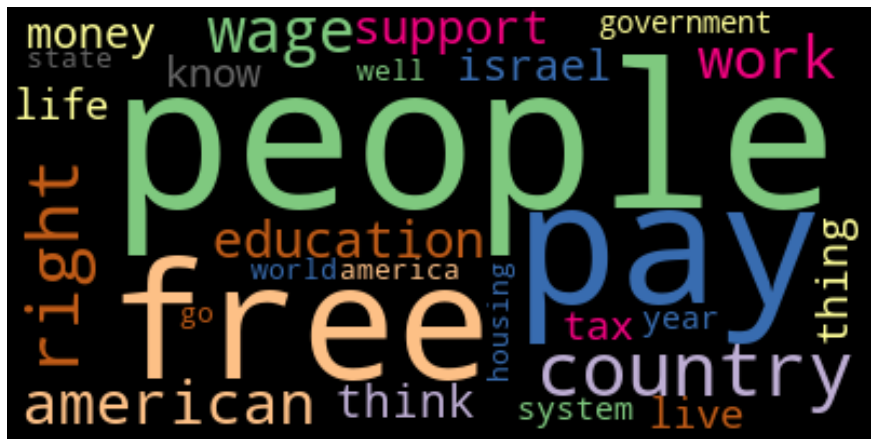

In [103]:
from wordcloud import WordCloud

#make wordcloud
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_28_dictionary)

#plot 
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('Political_Rights_Cloud.png')

plt.show()

### Public Services/ Accessibility


In [104]:
all_words = [word for tokens in df2['tweet'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['tweet']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))
print('Min tweet length is {}'.format(min(tweet_lengths)))

1858016 words total, with a vocabulary size of 629
Max tweet length is 964
Min tweet length is 4


/Users/mehikapatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


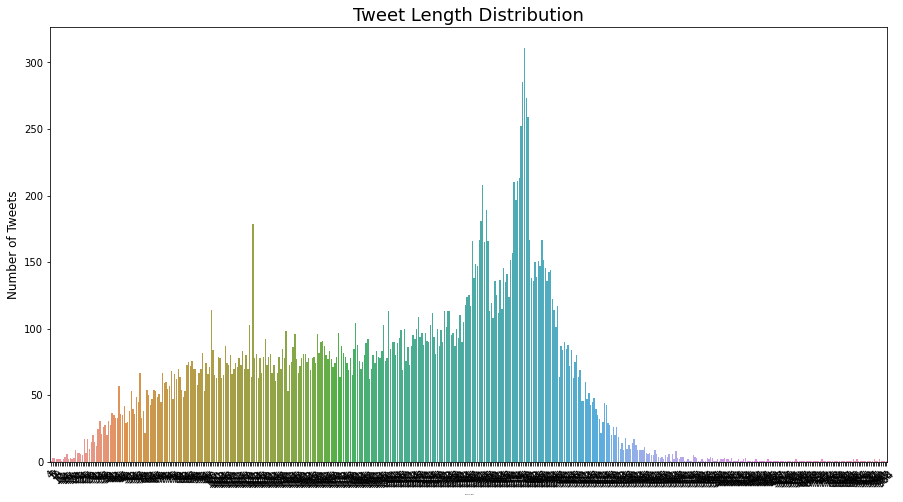

In [105]:
plt.figure(figsize = (15,8))
ax = sns.countplot(tweet_lengths)

plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = .2)
plt.xticks(rotation=45)
# ax.set_xlim(5, 900)
# ax.set_xticks(range(5,1000,50))
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

In [109]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df2['lemma_tokens'].str.split() for item in sublist]

word_freq = FreqDist(flat_words)

# word_freq.most_common(30)

In [110]:
#get words n count w touples
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#dict mapping of words
top_28_dictionary = dict(zip(most_common_word, most_common_count))

#remove healthcare, affordable, and universal from dict
del top_28_dictionary['healthcare']
del top_28_dictionary['affordable']
del top_28_dictionary['universal']


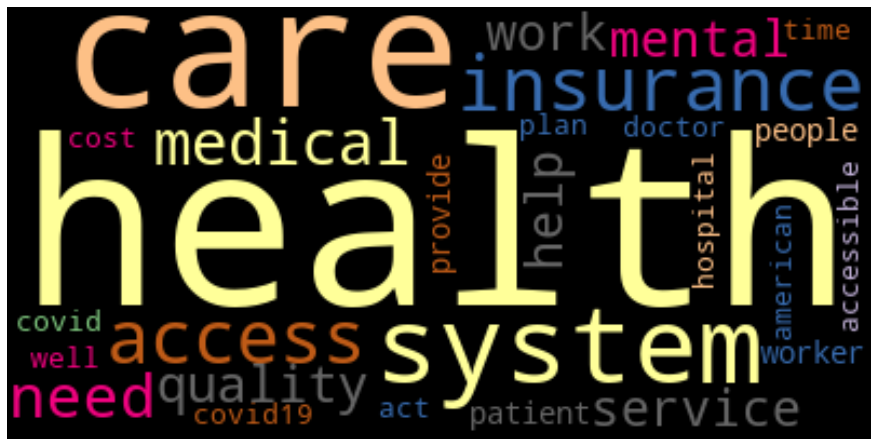

In [112]:
from wordcloud import WordCloud

#make wordcloud
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_28_dictionary)

#plot 
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('public_accessibility_cloud.png')

plt.show()

### Infrastructure

In [113]:
all_words = [word for tokens in df3['tweet'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df3['tweet']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))
print('Min tweet length is {}'.format(min(tweet_lengths)))

487832 words total, with a vocabulary size of 271
Max tweet length is 930
Min tweet length is 27


/Users/mehikapatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


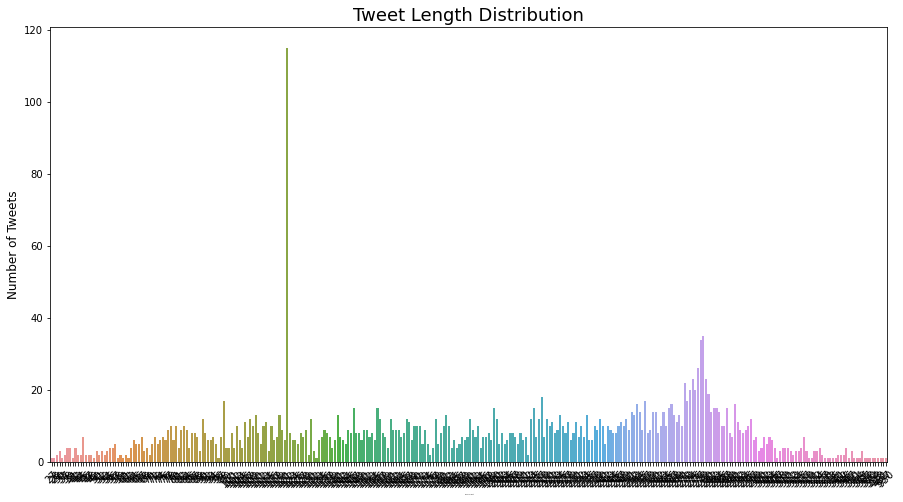

In [114]:
plt.figure(figsize = (15,8))
ax = sns.countplot(tweet_lengths)

plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = .2)
plt.xticks(rotation=45)
# ax.set_xlim(5, 900)
# ax.set_xticks(range(5,1000,50))
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

In [116]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df3['lemma_tokens'].str.split() for item in sublist]

word_freq = FreqDist(flat_words)

# word_freq.most_common(30)

In [117]:
#get words n count w touples
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#dict mapping of words
top_28_dictionary = dict(zip(most_common_word, most_common_count))

#remove healthcare, affordable, and universal from dict
del top_28_dictionary['healthcare']
del top_28_dictionary['affordable']
del top_28_dictionary['universal']



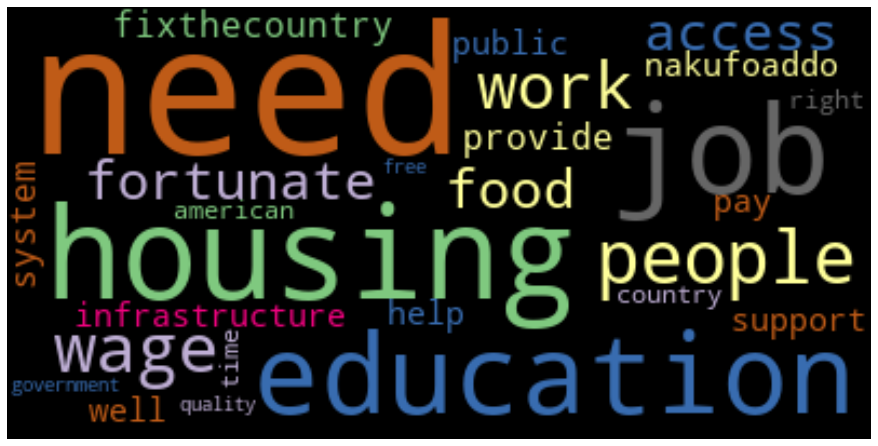

In [118]:
from wordcloud import WordCloud

#make wordcloud
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_28_dictionary)

#plot 
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('Infrastructure_cloud.png')

plt.show()

### Quality of Life

In [120]:
all_words = [word for tokens in df4['tweet'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df4['tweet']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))
print('Min tweet length is {}'.format(min(tweet_lengths)))


379243 words total, with a vocabulary size of 276
Max tweet length is 937
Min tweet length is 10


/Users/mehikapatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


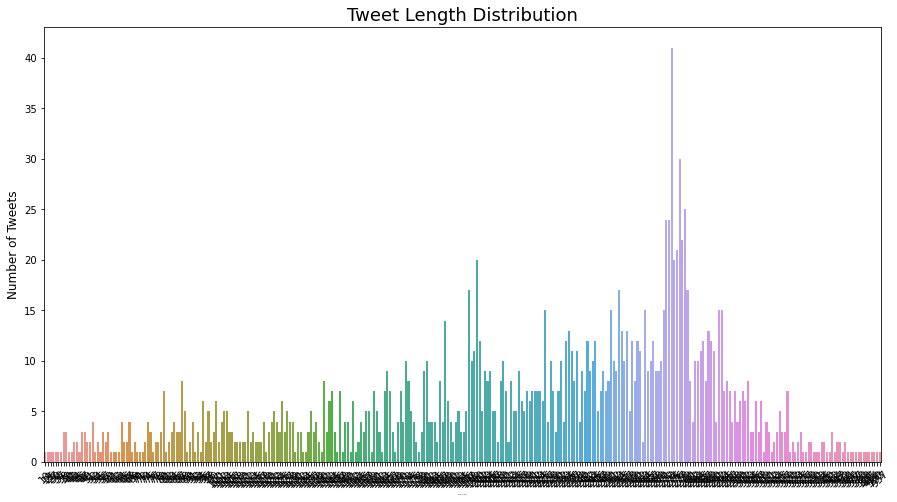

In [121]:
plt.figure(figsize = (15,8))
ax = sns.countplot(tweet_lengths)

plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = .2)
plt.xticks(rotation=45)
# ax.set_xlim(5, 900)
# ax.set_xticks(range(5,1000,50))
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

In [122]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df4['lemma_tokens'].str.split() for item in sublist]

word_freq = FreqDist(flat_words)

# word_freq.most_common(30)

In [123]:
#get words n count w touples
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#dict mapping of words
top_28_dictionary = dict(zip(most_common_word, most_common_count))

#remove healthcare, affordable, and universal from dict
del top_28_dictionary['healthcare']
del top_28_dictionary['affordable']
del top_28_dictionary['universal']



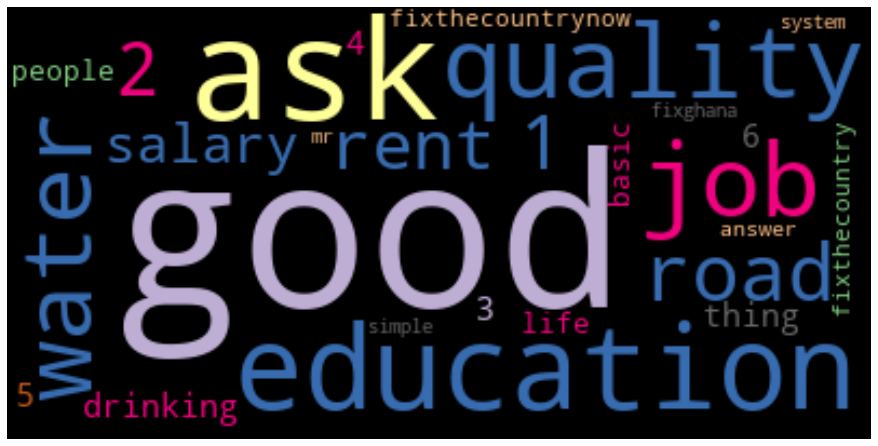

In [124]:
from wordcloud import WordCloud

#make wordcloud
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_28_dictionary)

#plot 
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('Quality_life_cloud.png')

plt.show()

### Comparisons

In [125]:
all_words = [word for tokens in df5['tweet'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df5['tweet']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))
print('Min tweet length is {}'.format(min(tweet_lengths)))


319489 words total, with a vocabulary size of 252
Max tweet length is 926
Min tweet length is 27


In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(tweet_lengths)

plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = .2)
plt.xticks(rotation=45)
# ax.set_xlim(5, 900)
# ax.set_xticks(range(5,1000,50))
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

In [126]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df5['lemma_tokens'].str.split() for item in sublist]

word_freq = FreqDist(flat_words)

# word_freq.most_common(30)

In [127]:
#get words n count w touples
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#dict mapping of words
top_28_dictionary = dict(zip(most_common_word, most_common_count))

#remove healthcare, affordable, and universal from dict
del top_28_dictionary['healthcare']
del top_28_dictionary['affordable']
del top_28_dictionary['universal']



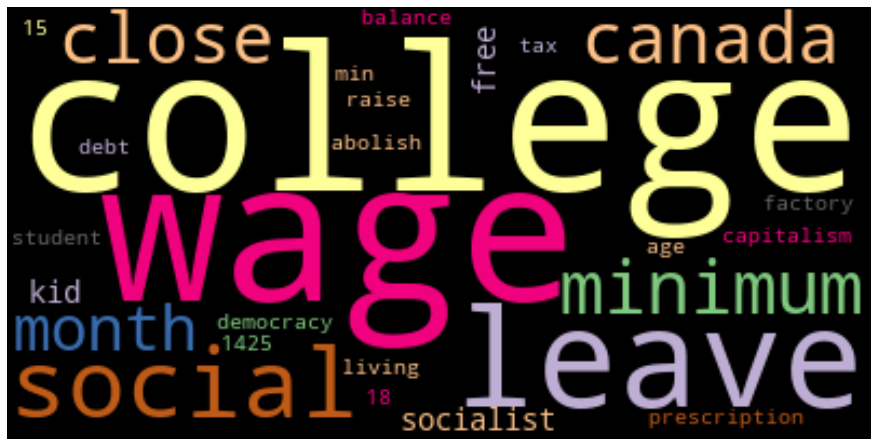

In [128]:
from wordcloud import WordCloud

#make wordcloud
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_28_dictionary)

#plot 
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('Comparisons_cloud.png')

plt.show()